In [1]:
import sys
sys.path.append("../")

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedGroupKFold
import glob
from utils import get_wav_files
from transforms import LabelsFromTxt
import os
from pathlib import Path
from utils import get_wav_files

/home/kpintaric/LUMEN-Data-Science-IRMAS/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = "../data/raw/IRMAS_Validation_Data/"
sound_files = get_wav_files(data_dir)
len(sound_files)

2874

In [3]:
df = pd.DataFrame(data=sound_files, columns=["path"])
df.head()

,path
0,../data/raw/IRMAS_Validation_Data/Track 01-7.wav
1,../data/raw/IRMAS_Validation_Data/Depeche Mode...
2,../data/raw/IRMAS_Validation_Data/01 Chuck Man...
3,../data/raw/IRMAS_Validation_Data/01. The Best...
4,../data/raw/IRMAS_Validation_Data/01) Bert Jan...


In [4]:
df["fname"] = df.path.map(lambda x: Path(x).stem)
df.head()

,path,fname
0,../data/raw/IRMAS_Validation_Data/Track 01-7.wav,Track 01-7
1,../data/raw/IRMAS_Validation_Data/Depeche Mode...,Depeche Mode - Personal Jesus-3
2,../data/raw/IRMAS_Validation_Data/01 Chuck Man...,01 Chuck Mangione_Feels So Good_Feels So Good-21
3,../data/raw/IRMAS_Validation_Data/01. The Best...,01. The Best Of Wayne Shorter - The Blue Note ...
4,../data/raw/IRMAS_Validation_Data/01) Bert Jan...,01) Bert Jansch - Avocet-20


In [5]:
pattern = '(.*)-[\d]+$'
df["full_fname"] = df.fname.str.extract(pattern)
df.head()

,path,fname,full_fname
0,../data/raw/IRMAS_Validation_Data/Track 01-7.wav,Track 01-7,Track 01
1,../data/raw/IRMAS_Validation_Data/Depeche Mode...,Depeche Mode - Personal Jesus-3,Depeche Mode - Personal Jesus
2,../data/raw/IRMAS_Validation_Data/01 Chuck Man...,01 Chuck Mangione_Feels So Good_Feels So Good-21,01 Chuck Mangione_Feels So Good_Feels So Good
3,../data/raw/IRMAS_Validation_Data/01. The Best...,01. The Best Of Wayne Shorter - The Blue Note ...,01. The Best Of Wayne Shorter - The Blue Note ...
4,../data/raw/IRMAS_Validation_Data/01) Bert Jan...,01) Bert Jansch - Avocet-20,01) Bert Jansch - Avocet


In [6]:
df.full_fname.nunique()

208

In [7]:
label_extractor = LabelsFromTxt()
"-".join(list(label_extractor(sound_files[0])))

'gac-voi'

In [8]:
df["label"] = df.path.map(lambda x: "-".join(list(label_extractor(x))))
df.head()

,path,fname,full_fname,label
0,../data/raw/IRMAS_Validation_Data/Track 01-7.wav,Track 01-7,Track 01,gac-voi
1,../data/raw/IRMAS_Validation_Data/Depeche Mode...,Depeche Mode - Personal Jesus-3,Depeche Mode - Personal Jesus,gel-voi
2,../data/raw/IRMAS_Validation_Data/01 Chuck Man...,01 Chuck Mangione_Feels So Good_Feels So Good-21,01 Chuck Mangione_Feels So Good_Feels So Good,gac-gel
3,../data/raw/IRMAS_Validation_Data/01. The Best...,01. The Best Of Wayne Shorter - The Blue Note ...,01. The Best Of Wayne Shorter - The Blue Note ...,pia-sax
4,../data/raw/IRMAS_Validation_Data/01) Bert Jan...,01) Bert Jansch - Avocet-20,01) Bert Jansch - Avocet,gac-vio


In [9]:
df.label.nunique()

108

In [10]:
df["label_count"] = df.label.map(lambda x: len(x.split("-")))
df.head()

,path,fname,full_fname,label,label_count
0,../data/raw/IRMAS_Validation_Data/Track 01-7.wav,Track 01-7,Track 01,gac-voi,2
1,../data/raw/IRMAS_Validation_Data/Depeche Mode...,Depeche Mode - Personal Jesus-3,Depeche Mode - Personal Jesus,gel-voi,2
2,../data/raw/IRMAS_Validation_Data/01 Chuck Man...,01 Chuck Mangione_Feels So Good_Feels So Good-21,01 Chuck Mangione_Feels So Good_Feels So Good,gac-gel,2
3,../data/raw/IRMAS_Validation_Data/01. The Best...,01. The Best Of Wayne Shorter - The Blue Note ...,01. The Best Of Wayne Shorter - The Blue Note ...,pia-sax,2
4,../data/raw/IRMAS_Validation_Data/01) Bert Jan...,01) Bert Jansch - Avocet-20,01) Bert Jansch - Avocet,gac-vio,2


<Axes: >

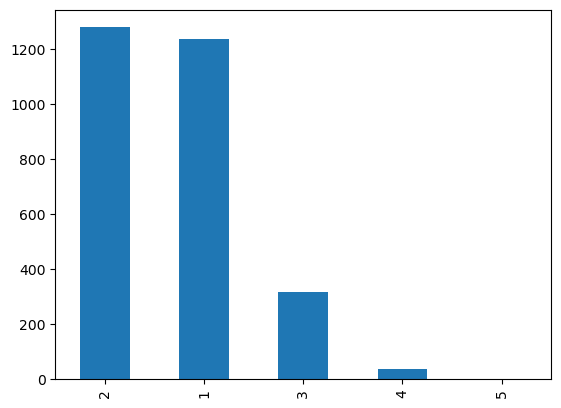

In [11]:
df.label_count.value_counts().plot(kind="bar")

In [12]:
kf = StratifiedGroupKFold(n_splits=2, shuffle=True, random_state=123)
splits = kf.split(df.path, df.label, groups=df.full_fname)
valid, test = list(splits)[0]

/home/kpintaric/LUMEN-Data-Science-IRMAS/venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:909: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


In [13]:
df.iloc[valid].sort_values(by="fname")

,path,fname,full_fname,label,label_count
1671,../data/raw/IRMAS_Validation_Data/00 - gold fr...,00 - gold fronts-1,00 - gold fronts,voi,1
327,../data/raw/IRMAS_Validation_Data/00 - gold fr...,00 - gold fronts-10,00 - gold fronts,gel,1
755,../data/raw/IRMAS_Validation_Data/00 - gold fr...,00 - gold fronts-12,00 - gold fronts,pia-voi,2
1426,../data/raw/IRMAS_Validation_Data/00 - gold fr...,00 - gold fronts-13,00 - gold fronts,gac-voi,2
132,../data/raw/IRMAS_Validation_Data/00 - gold fr...,00 - gold fronts-2,00 - gold fronts,gel-voi,2
...,...,...,...,...,...
390,../data/raw/IRMAS_Validation_Data/talk talk - ...,talk talk - spirit of eden - 05 - i believe in...,talk talk - spirit of eden - 05 - i believe in...,gel-pia,2
1233,../data/raw/IRMAS_Validation_Data/talk talk - ...,talk talk - spirit of eden - 05 - i believe in...,talk talk - spirit of eden - 05 - i believe in...,gel-pia,2
454,../data/raw/IRMAS_Validation_Data/talk talk - ...,talk talk - spirit of eden - 05 - i believe in...,talk talk - spirit of eden - 05 - i believe in...,gel-pia-voi,3
1282,../data/raw/IRMAS_Validation_Data/talk talk - ...,talk talk - spirit of eden - 05 - i believe in...,talk talk - spirit of eden - 05 - i believe in...,gel,1


In [14]:
df = pd.read_csv("../metadata.csv")

In [ ]:
def generate_metadata_(df, subset="train"):
    
    df["fname"] = df.path.map(lambda x: Path(x).stem)
    pattern = '(.*)_[\d]+$' if subset=="train" else '(.*)-[\d]+$'
    df["full_fname"] = df.fname.str.extract(pattern)

    label_extractor = LabelsFromTxt()
    df["label"] = df.path.map(lambda x: "-".join(list(label_extractor(x))))
    df["label_count"] = df.label.map(lambda x: len(x.split("-")))
    

In [18]:
import librosa
import numpy as np
import IPython.display as ipd
import pandas as pd

In [21]:
audio, sr = librosa.load("../data/processed/all_sync/IRMAS_Training_Data/sax-gac/033__[sax][dru][cou_fol]1701__1-[gac][pop_roc]0731__1.wav", sr=None)

In [23]:
ipd.Audio(audio, rate=sr)

In [4]:
df = pd.read_csv("../metadata_train.csv")

In [6]:
df.loc[df.onset>16000]

,pitch,bpm,onset,fname,song_name,instr,label_count
20,5.456070,170.454545,24576,[tru][jaz_blu]2026__2,[tru][jaz_blu]2026,tru,1
293,5.914500,144.230769,20480,[tru][pop_roc]2036__1,[tru][pop_roc]2036,tru,1
648,5.718750,170.454545,36864,[sax][cla]1750__1,[sax][cla]1750,sax,1
2096,4.844870,117.187500,32256,[gac][cla]0582__2,[gac][cla]0582,gac,1
2124,5.799196,170.454545,21504,[gac][cla]0527__2,[gac][cla]0527,gac,1
3052,4.296767,85.227273,32768,[org][pop_roc]1227__1,[org][pop_roc]1227,org,1
3194,6.313658,104.166667,17920,101__[cla][nod][cla]0213__1,101__[cla][nod][cla]0213,cla,1
3355,6.405373,156.250000,16896,145__[cla][nod][cla]0234__2,145__[cla][nod][cla]0234,cla,1
3674,6.338914,125.000000,16384,030__[flu][nod][cla]0373__3,030__[flu][nod][cla]0373,flu,1
3750,4.641053,144.230769,18944,[flu][pop_roc]0497__2,[flu][pop_roc]0497,flu,1


In [16]:
audio, sr = librosa.load("/home/kpintaric/LUMEN-Data-Science-IRMAS/data/raw/IRMAS_Training_Data/tru/[tru][jaz_blu]2026__2.wav", sr=16000, mono=True)
ipd.Audio(audio, rate=sr)

In [17]:
pitched = librosa.effects.pitch_shift(y=audio, sr=sr, n_steps=24)
ipd.Audio(pitched, rate=sr)

In [15]:
down = librosa.resample(pitched, orig_sr=sr, target_sr=16000)
ipd.Audio(down, rate=16000)

In [40]:
path1 = "/home/kpintaric/LUMEN-Data-Science-IRMAS/data/raw/IRMAS_Training_Data/org/[org][pop_roc]1227__1.wav"
path2 = "/home/kpintaric/LUMEN-Data-Science-IRMAS/data/raw/IRMAS_Training_Data/cel/132__[cel][nod][cla]0048__2.wav"
path3 = "/home/kpintaric/LUMEN-Data-Science-IRMAS/data/raw/IRMAS_Training_Data/cel/132__[cel][nod][cla]0048__3.wav"

file1, sr = librosa.load(path1, mono=False)
file2, _ = librosa.load(path2, mono=False)
file3, _ = librosa.load(path3, mono=False)

full = np.concatenate([file1, file2, file3], axis=-1)

In [43]:
df.drop(columns="fname")

,instr,pitch,bpm,onset
0,tru,6.428870,125.000000,4608
1,tru,6.590958,187.500000,1536
2,tru,4.297973,89.285714,1536
3,tru,5.887886,104.166667,2560
4,tru,5.316590,144.230769,1536
...,...,...,...,...
6700,pia,4.608736,104.166667,1536
6701,pia,4.361875,85.227273,1536
6702,pia,4.433370,104.166667,1536
6703,pia,4.644258,89.285714,1536


In [41]:
ipd.Audio(full, rate=sr)